<a href="https://colab.research.google.com/github/Divyasri-1323/NLP-PROJECT/blob/main/nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 60)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 60, 128)   │  1,920,000 │ input_layer[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 60, 128)   │     66,048 │ embedding[0][0],  │
│ (MultiHeadAttentio… │                   │            │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 60, 128)   │          0 │ embedding[0][0],  │
│                     │                   │            │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, 60, 128)   │        256 │ add[0][0]         │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential          │ (None, 60, 128)   │     33,024 │ layer_normalizat… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 60, 128)   │          0 │ layer_normalizat… │
│                     │                   │            │ sequential[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 60, 128)   │        256 │ add_1[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 128)       │          0 │ layer_normalizat… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 128)       │     16,512 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 128)       │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 13)        │      1,677 │ dropout_2[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,037,773 (7.77 MB)

 Trainable params: 2,037,773 (7.77 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
13218/13218 ━━━━━━━━━━━━━━━━━━━━ 1092s 82ms/step - accuracy: 0.9494 - loss: 0.2421 - val_accuracy: 0.9975 - val_loss: 0.0189 - learning_rate: 3.0000e-04
Epoch 2/15
13218/13218 ━━━━━━━━━━━━━━━━━━━━ 1072s 81ms/step - accuracy: 0.9978 - loss: 0.0157 - val_accuracy: 0.9967 - val_loss: 0.0212 - learning_rate: 3.0000e-04
Epoch 3/15
13218/13218 ━━━━━━━━━━━━━━━━━━━━ 1065s 81ms/step - accuracy: 0.9982 - loss: 0.0110 - val_accuracy: 0.9977 - val_loss: 0.0196 - learning_rate: 3.0000e-04
Epoch 4/15
13218/13218 ━━━━━━━━━━━━━━━━━━━━ 1105s 84ms/step - accuracy: 0.9988 - loss: 0.0070 - val_accuracy: 0.9981 - val_loss: 0.0164 - learning_rate: 9.0000e-05
Epoch 5/15
13218/13218 ━━━━━━━━━━━━━━━━━━━━ 1103s 83ms/step - accuracy: 0.9992 - loss: 0.0045 - val_accuracy: 0.9979 - val_loss: 0.0157 - learning_rate: 9.0000e-05
Epoch 6/15
13218/13218 ━━━━━━━━━━━━━━━━━━━━ 1064s 80ms/step - accuracy: 0.9993 - loss: 0.0039 - val_accuracy: 0.9981 - val_loss: 0.0184 - learning_rate: 9.0000e-05
Epoch 7/15
13218

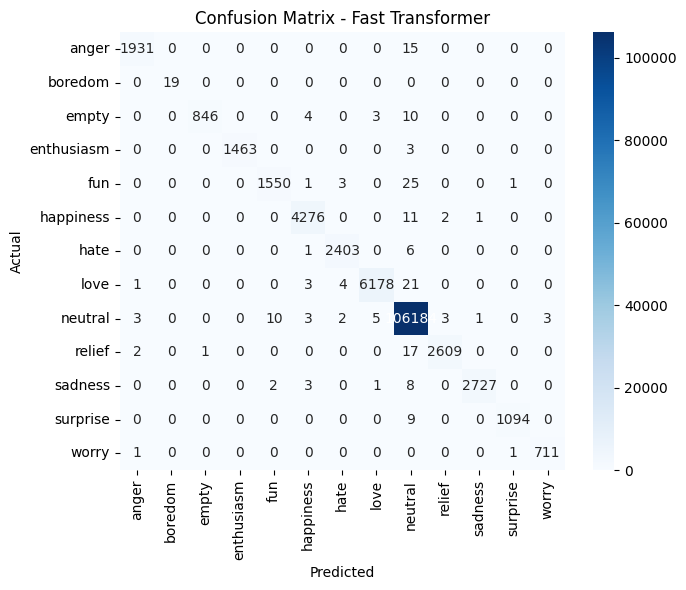

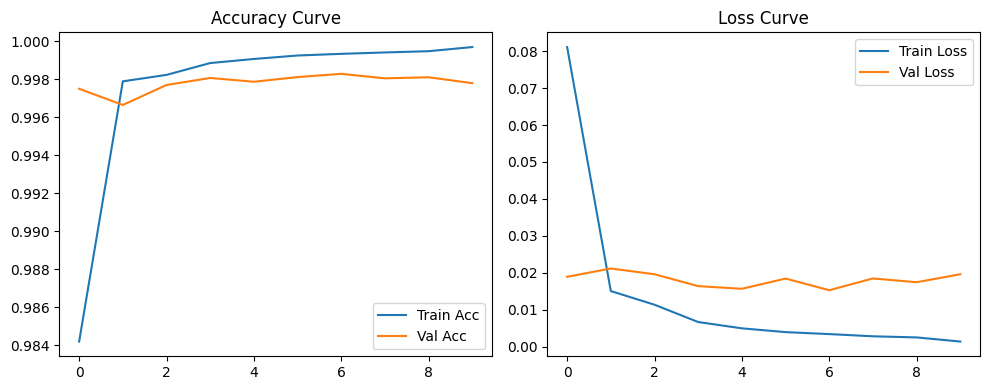

In [1]:
# ==========================
# Fast Transformer Encoder (CPU Optimized, >90% Accuracy)
# ==========================

!pip install tensorflow scikit-learn matplotlib seaborn -q

import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, time, tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Embedding, Dense, Dropout, GlobalAveragePooling1D, LayerNormalization, MultiHeadAttention, Input
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# ===================================================================
# 1. Load Dataset
# ===================================================================
DATA_PATH = "/content/emotion_sentimen_dataset.csv"
df = pd.read_csv(DATA_PATH, index_col=0)
df = df[['text', 'Emotion']].dropna()
df['text'] = df['text'].astype(str)

# Encode labels
le = LabelEncoder()
y = le.fit_transform(df['Emotion'])
class_names = list(le.classes_)
num_classes = len(class_names)

# Train-test split
X_train_text, X_test_text, y_train, y_test = train_test_split(
    df['text'], y, test_size=0.2, random_state=42, stratify=y
)

# ===================================================================
# 2. Tokenization
# ===================================================================
max_words = 15000   # fewer vocab for CPU speed
max_len = 60        # shorter sequences -> faster attention

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train_text)

X_train_seq = pad_sequences(tokenizer.texts_to_sequences(X_train_text), maxlen=max_len)
X_test_seq = pad_sequences(tokenizer.texts_to_sequences(X_test_text), maxlen=max_len)

y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

# ===================================================================
# 3. Fast Transformer Model
# ===================================================================
def fast_transformer_model(vocab_size, embed_dim, input_len, num_classes, num_heads=4):
    inputs = Input(shape=(input_len,))
    x = Embedding(input_dim=vocab_size, output_dim=embed_dim)(inputs)

    # Single efficient attention block
    attn = MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim // num_heads)(x, x)
    x = LayerNormalization(epsilon=1e-6)(x + attn)

    # Simple FFN block
    ffn = Sequential([
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(embed_dim)
    ])
    x = LayerNormalization(epsilon=1e-6)(x + ffn(x))

    # Global pooling + classifier
    x = GlobalAveragePooling1D()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = fast_transformer_model(max_words, 128, max_len, num_classes)
model.summary()

# ===================================================================
# 4. Training Setup
# ===================================================================
callbacks = [
    EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=2)
]

start = time.time()
history = model.fit(
    X_train_seq, y_train_cat,
    validation_split=0.2,
    epochs=15,
    batch_size=32,         # smaller batch fits CPU cache
    callbacks=callbacks,
    verbose=1
)
print(f"\nTraining completed in {(time.time() - start)/60:.2f} minutes")

# ===================================================================
# 5. Evaluation
# ===================================================================
y_pred_prob = model.predict(X_test_seq, verbose=0)
y_pred = np.argmax(y_pred_prob, axis=1)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
print(f"\n✅ Accuracy: {acc*100:.2f}%")
print(f"✅ Macro F1: {f1:.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=class_names))

# Confusion Matrix
plt.figure(figsize=(7,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',
            cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix - Fast Transformer")
plt.xlabel("Predicted"); plt.ylabel("Actual")
plt.tight_layout(); plt.show()

# Training Curves
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy Curve'); plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Curve'); plt.legend()
plt.tight_layout(); plt.show()

Classes: ['anger', 'boredom', 'empty', 'enthusiasm', 'fun', 'happiness', 'hate', 'love', 'neutral', 'relief', 'sadness', 'surprise', 'worry']

Training samples: 14980, Test samples: 3746

--- Preprocessing for ML Models (TF-IDF) ---
Fitting TF-IDF Vectorizer...
Transforming test data...
TF-IDF matrix shape (Train): (14980, 20000)
XGBoost Training samples: 13482, XGBoost Validation samples: 1498

--- Preprocessing for DL Models (Tokenize & Pad) ---
Padded sequence shape (Train): (14980, 100)

--- Training Model 2: XGBoost ---
Fitting XGBoost model... (This may take some time)
XGBoost training time: 56.30s

=== Evaluation Metrics: XGBoost ===
Accuracy: 0.9725
Macro F1 Score: 0.8432

Classification Report:
               precision    recall  f1-score   support

       anger       0.96      0.82      0.89        62
     boredom       0.00      0.00      0.00         1
       empty       1.00      0.88      0.94        25
  enthusiasm       0.95      0.93      0.94        43
         fun   

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


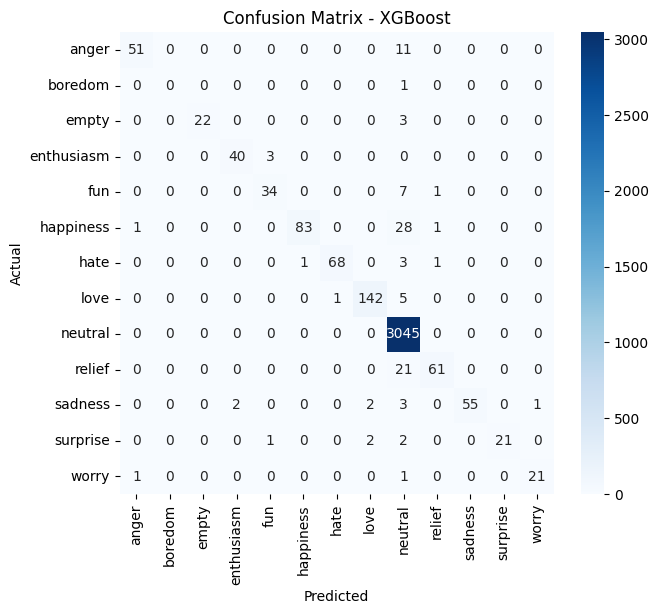


--- Training Model 3: LSTM ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 42s 205ms/step - accuracy: 0.7888 - loss: 1.2324 - val_accuracy: 0.8111 - val_loss: 0.8743 - learning_rate: 0.0010
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 40s 198ms/step - accuracy: 0.8148 - loss: 0.8113 - val_accuracy: 0.8508 - val_loss: 0.4779 - learning_rate: 0.0010
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 36s 193ms/step - accuracy: 0.8478 - loss: 0.4800 - val_accuracy: 0.8618 - val_loss: 0.4539 - learning_rate: 0.0010
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 37s 196ms/step - accuracy: 0.8654 - loss: 0.4398 - val_accuracy: 0.8875 - val_loss: 0.3627 - learning_rate: 0.0010
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 36s 191ms/step - accuracy: 0.8887 - loss: 0.3204 - val_accuracy: 0.9166 - val_loss: 0.3061 - learning_rate: 0.0010
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 42s 198ms/step - accuracy: 0.9079 - loss: 0.2673 - val_accuracy: 0.9282 - val_loss: 0.2727 - learning_rate: 0.0010
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 37s 198ms/step - accuracy: 0.9

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


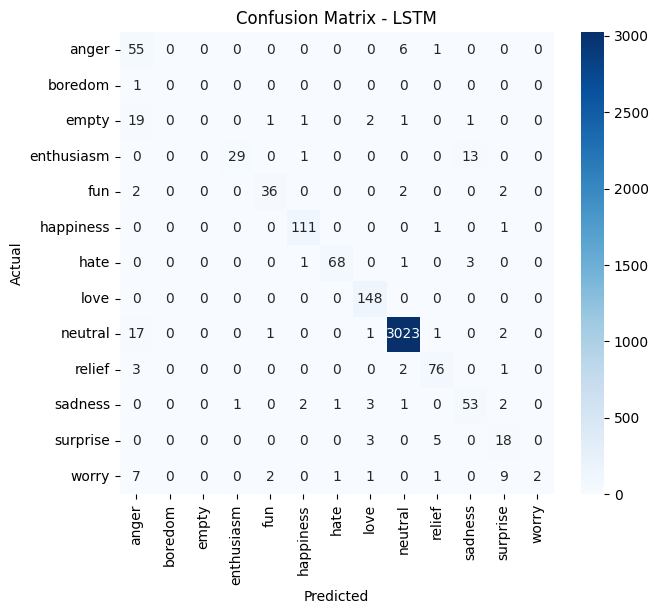


--- Training Model 4: XLSTM (Bidirectional/Stacked) ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 132s 652ms/step - accuracy: 0.7645 - loss: 1.2281 - val_accuracy: 0.8111 - val_loss: 0.8053 - learning_rate: 0.0010
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 124s 661ms/step - accuracy: 0.8341 - loss: 0.6478 - val_accuracy: 0.8595 - val_loss: 0.4626 - learning_rate: 0.0010
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 124s 659ms/step - accuracy: 0.8507 - loss: 0.4547 - val_accuracy: 0.8768 - val_loss: 0.3806 - learning_rate: 0.0010
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 118s 630ms/step - accuracy: 0.8919 - loss: 0.3285 - val_accuracy: 0.8868 - val_loss: 0.3279 - learning_rate: 0.0010
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 132s 701ms/step - accuracy: 0.8990 - loss: 0.3121 - val_accuracy: 0.9139 - val_loss: 0.2794 - learning_rate: 0.0010
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 119s 632ms/step - accuracy: 0.9143 - loss: 0.2662 - val_accuracy: 0.9115 - val_loss: 0.2839 - learning_rate: 0.0010
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 144s 644ms/step - accura

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


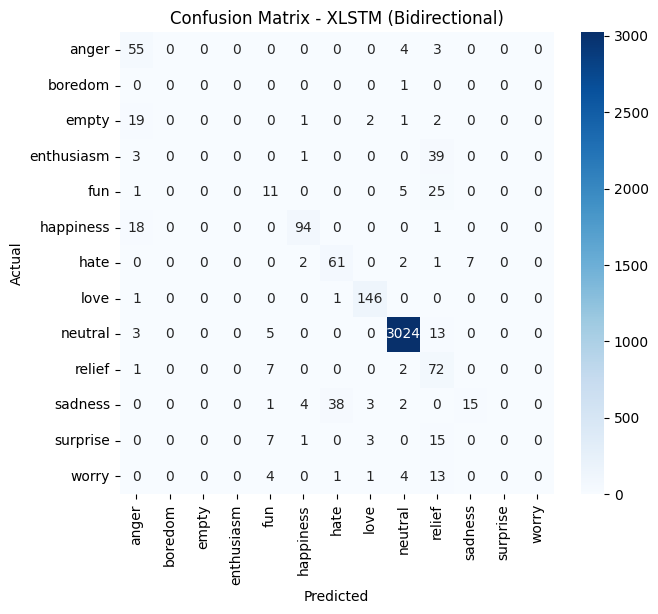


✅ All models trained and evaluated.


In [3]:
# ==========================
# Emotion Recognition with Multiple Models
# ==========================

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)
from sklearn.feature_extraction.text import TfidfVectorizer

# --- ML Models ---
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

# --- DL Models ---
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Embedding, LSTM, Dense, Dropout,
    GlobalMaxPooling1D, Bidirectional
)
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical

# ===================================================================
# 1. Load and Prepare Data (Common for all models)
# ===================================================================

# --- Load Dataset ---
DATA_PATH = "/content/emotion_sentimen_dataset.csv"
df = pd.read_csv(DATA_PATH, index_col=0)

# --- Clean and Define Columns ---
text_col = 'text'
label_col = 'Emotion'
df = df[[text_col, label_col]].dropna().rename(columns={text_col: "text", label_col: "label"})
df['text'] = df['text'].astype(str)

# --- Encode Labels ---
le = LabelEncoder()
y = le.fit_transform(df['label'])
class_names = list(le.classes_)
num_classes = len(class_names)
print(f"Classes: {class_names}")

# --- Split Data (Text and Labels) ---
# We split the raw text first for all models
X_train_text, X_test_text, y_train, y_test = train_test_split(
    df['text'], y, test_size=0.2, random_state=42, stratify=y
)
print(f"\nTraining samples: {len(X_train_text)}, Test samples: {len(X_test_text)}")

# ===================================================================
# 2. Preprocessing for ML Models (AdaBoost, XGBoost)
# ===================================================================
print("\n--- Preprocessing for ML Models (TF-IDF) ---")

# Use TF-IDF to convert text into numerical features
# max_features=20000 to match the vocab size of DL models
tfidf_vectorizer = TfidfVectorizer(max_features=20000, ngram_range=(1, 2))

print("Fitting TF-IDF Vectorizer...")
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_text)
print("Transforming test data...")
X_test_tfidf = tfidf_vectorizer.transform(X_test_text)
print(f"TF-IDF matrix shape (Train): {X_train_tfidf.shape}")

# Split training data further for XGBoost validation set
X_train_tfidf_xgb, X_val_tfidf_xgb, y_train_xgb, y_val_xgb = train_test_split(
    X_train_tfidf, y_train, test_size=0.1, random_state=42, stratify=y_train
)
print(f"XGBoost Training samples: {X_train_tfidf_xgb.shape[0]}, XGBoost Validation samples: {X_val_tfidf_xgb.shape[0]}")


# ===================================================================
# 3. Preprocessing for DL Models (LSTM, XLSTM)
# ===================================================================
print("\n--- Preprocessing for DL Models (Tokenize & Pad) ---")

max_words, max_len = 20000, 100
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train_text)

# --- Tokenize and Pad Sequences ---
X_train_seq = pad_sequences(tokenizer.texts_to_sequences(X_train_text), maxlen=max_len)
X_test_seq = pad_sequences(tokenizer.texts_to_sequences(X_test_text), maxlen=max_len)

# --- Create Categorical Labels ---
y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_test_cat = to_categorical(y_test, num_classes=num_classes)
print(f"Padded sequence shape (Train): {X_train_seq.shape}")

# ===================================================================
# 4. Helper Function for Evaluation
# ===================================================================

def evaluate_model(model_name, y_true, y_pred, class_names):
    """Prints a full evaluation report."""
    print(f"\n=== Evaluation Metrics: {model_name} ===")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Macro F1 Score: {f1_score(y_true, y_pred, average='macro'):.4f}")
    print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=class_names))

    # Plot Confusion Matrix
    plt.figure(figsize=(7, 6))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.savefig(f"confusion_matrix_{model_name.lower()}.png")
    plt.show()

'''# ===================================================================
# Model 1: AdaBoost
# ===================================================================
print("\n--- Training Model 1: AdaBoost ---")
# Note: AdaBoost can be slow on large, high-dimensional data.
# We use a smaller number of estimators for this example.
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)

start_time = time.time()
ada_model.fit(X_train_tfidf, y_train)
print(f"AdaBoost training time: {time.time() - start_time:.2f}s")

y_pred_ada = ada_model.predict(X_test_tfidf)
evaluate_model("AdaBoost", y_test, y_pred_ada, class_names)'''

# ===================================================================
# Model 2: XGBoost
# ===================================================================
print("\n--- Training Model 2: XGBoost ---")
# XGBoost is generally faster and more accurate than AdaBoost
# It requires labels to be 0 to num_classes-1, which they are (y_train)
xgb_model = XGBClassifier(
    objective='multi:softmax',  # Use 'multi:softmax' for multiclass classification
    num_class=num_classes,
    n_estimators=200,          # Number of trees
    learning_rate=0.1,
    max_depth=6,
    n_jobs=-1,                 # Use all available cores
    random_state=42,
    early_stopping_rounds=10   # Stop if validation score doesn't improve
)

start_time = time.time()
# XGBoost can use a validation set for early stopping
print("Fitting XGBoost model... (This may take some time)")
xgb_model.fit(
    X_train_tfidf_xgb, y_train_xgb,
    eval_set=[(X_val_tfidf_xgb, y_val_xgb)],  # Provide validation set
    verbose=False  # Set verbose=True for details during training
)
print(f"XGBoost training time: {time.time() - start_time:.2f}s")

y_pred_xgb = xgb_model.predict(X_test_tfidf)
evaluate_model("XGBoost", y_test, y_pred_xgb, class_names)

# ===================================================================
# Model 3: LSTM (Long Short-Term Memory)
# ===================================================================
print("\n--- Training Model 3: LSTM ---")
# Callbacks for all DL models
es = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2)

def create_lstm_model(input_dim, output_dim, input_length, num_classes):
    model = Sequential([
        Embedding(input_dim=input_dim, output_dim=output_dim, input_length=input_length),
        LSTM(128, dropout=0.2, recurrent_dropout=0.2), # 128-unit LSTM layer
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

lstm_model = create_lstm_model(max_words, 128, max_len, num_classes)
lstm_model.summary()

start_time = time.time()
history_lstm = lstm_model.fit(
    X_train_seq, y_train_cat,
    validation_split=0.2,
    epochs=10,
    batch_size=64,
    callbacks=[es, rlr],
    verbose=1
)
print(f"LSTM training time: {time.time() - start_time:.2f}s")

# Evaluate LSTM
y_pred_prob_lstm = lstm_model.predict(X_test_seq)
y_pred_lstm = np.argmax(y_pred_prob_lstm, axis=1)
evaluate_model("LSTM", y_test, y_pred_lstm, class_names)

# ===================================================================
# Model 4: "XLSTM" (Bidirectional Stacked LSTM)
# ===================================================================
print("\n--- Training Model 4: XLSTM (Bidirectional/Stacked) ---")
# This is a more complex model.
# 'return_sequences=True' is needed to pass output sequences to the next LSTM layer.

def create_xlstm_model(input_dim, output_dim, input_length, num_classes):
    model = Sequential([
        Embedding(input_dim=input_dim, output_dim=output_dim, input_length=input_length),
        Bidirectional(LSTM(128, return_sequences=True, dropout=0.2, recurrent_dropout=0.2)),
        Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2)), # Second layer
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

xlstm_model = create_xlstm_model(max_words, 128, max_len, num_classes)
xlstm_model.summary()

start_time = time.time()
history_xlstm = xlstm_model.fit(
    X_train_seq, y_train_cat,
    validation_split=0.2,
    epochs=10,
    batch_size=64,
    callbacks=[es, rlr],
    verbose=1
)
print(f"XLSTM training time: {time.time() - start_time:.2f}s")

# Evaluate XLSTM
y_pred_prob_xlstm = xlstm_model.predict(X_test_seq)
y_pred_xlstm = np.argmax(y_pred_prob_xlstm, axis=1)
evaluate_model("XLSTM (Bidirectional)", y_test, y_pred_xlstm, class_names)

print("\n✅ All models trained and evaluated.")